# 데이콘 전복 나이 예측 경진대회

## 1. Import Packages

In [734]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 2. Read Data

In [735]:
train = pd.read_csv('train.csv')

In [736]:
'''
id : 샘플 아이디
Gender : 전복 성별
Lenght : 전복 길이
Diameter : 전복 둘레
Height : 전복 키 
Whole : Weight : 전복 전체 무게
Shucked Weight : 껍질을 제외한 무게
Viscra Weight : 내장 무게
Shell Weight : 껍질 무게
Target : 전복 나이
'''
train.head()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,2,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,3,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,4,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,5,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [737]:
train.shape

(1253, 10)

In [738]:
train.isna().sum()

id                0
Gender            0
Lenght            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscra Weight     0
Shell Weight      0
Target            0
dtype: int64

In [739]:
test = pd.read_csv('test.csv')

## 3. EDA

In [740]:
train.corr()['Target']

id                0.060358
Lenght            0.543789
Diameter          0.567933
Height            0.604654
Whole Weight      0.538404
Shucked Weight    0.420126
Viscra Weight     0.497283
Shell Weight      0.625819
Target            1.000000
Name: Target, dtype: float64

In [741]:
train.describe()

,id,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,627.000000,0.522869,0.406963,0.139545,0.831199,0.358818,0.181006,0.240077,9.912211
std,361.854252,0.120231,0.099771,0.039033,0.500491,0.224612,0.111936,0.142574,3.214676
min,1.000000,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,314.000000,0.445000,0.345000,0.115000,0.440500,0.182500,0.092500,0.130000,8.000000
50%,627.000000,0.535000,0.420000,0.140000,0.777500,0.326000,0.168000,0.230000,10.000000
75%,940.000000,0.615000,0.480000,0.165000,1.160000,0.505500,0.256500,0.330000,11.000000
max,1253.000000,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000


### 3-1. BarPlot

<AxesSubplot:xlabel='Target', ylabel='count'>

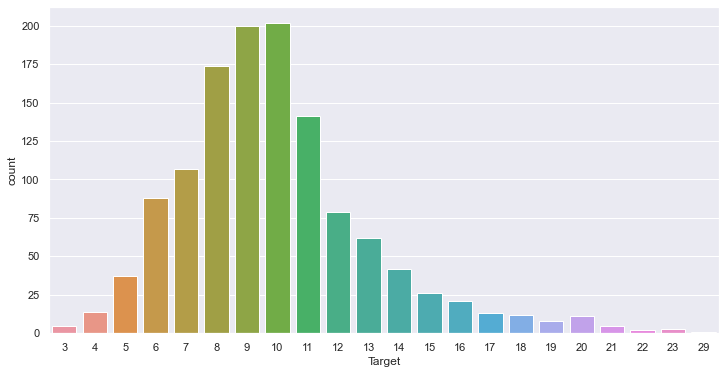

In [742]:
plt.figure(figsize = (12,6))
sns.countplot(train['Target'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

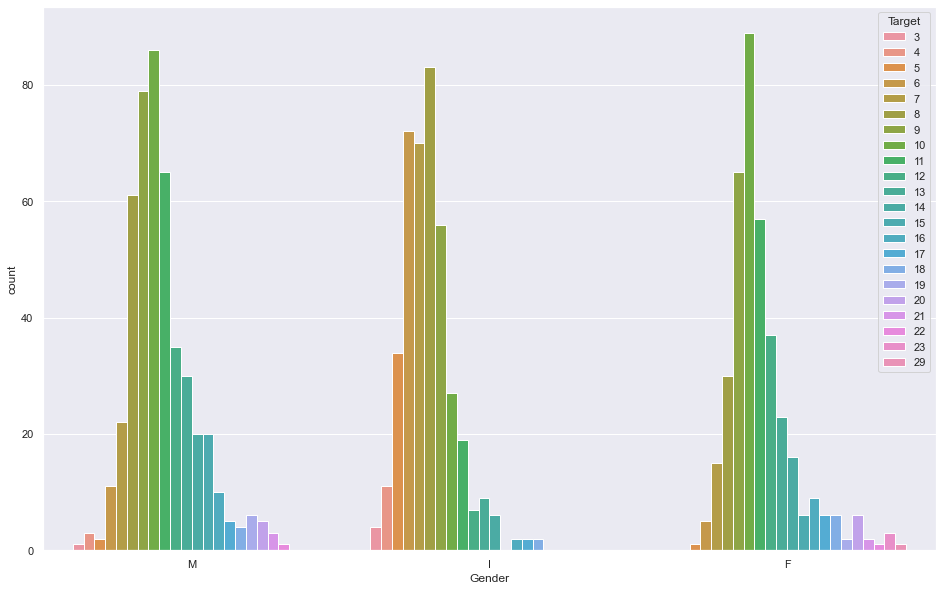

In [743]:
plt.figure(figsize = (16,10))
sns.countplot(data = train, hue = 'Target', x = 'Gender')

In [744]:
cols = train.columns

### 3-1-1. ScatterPlot

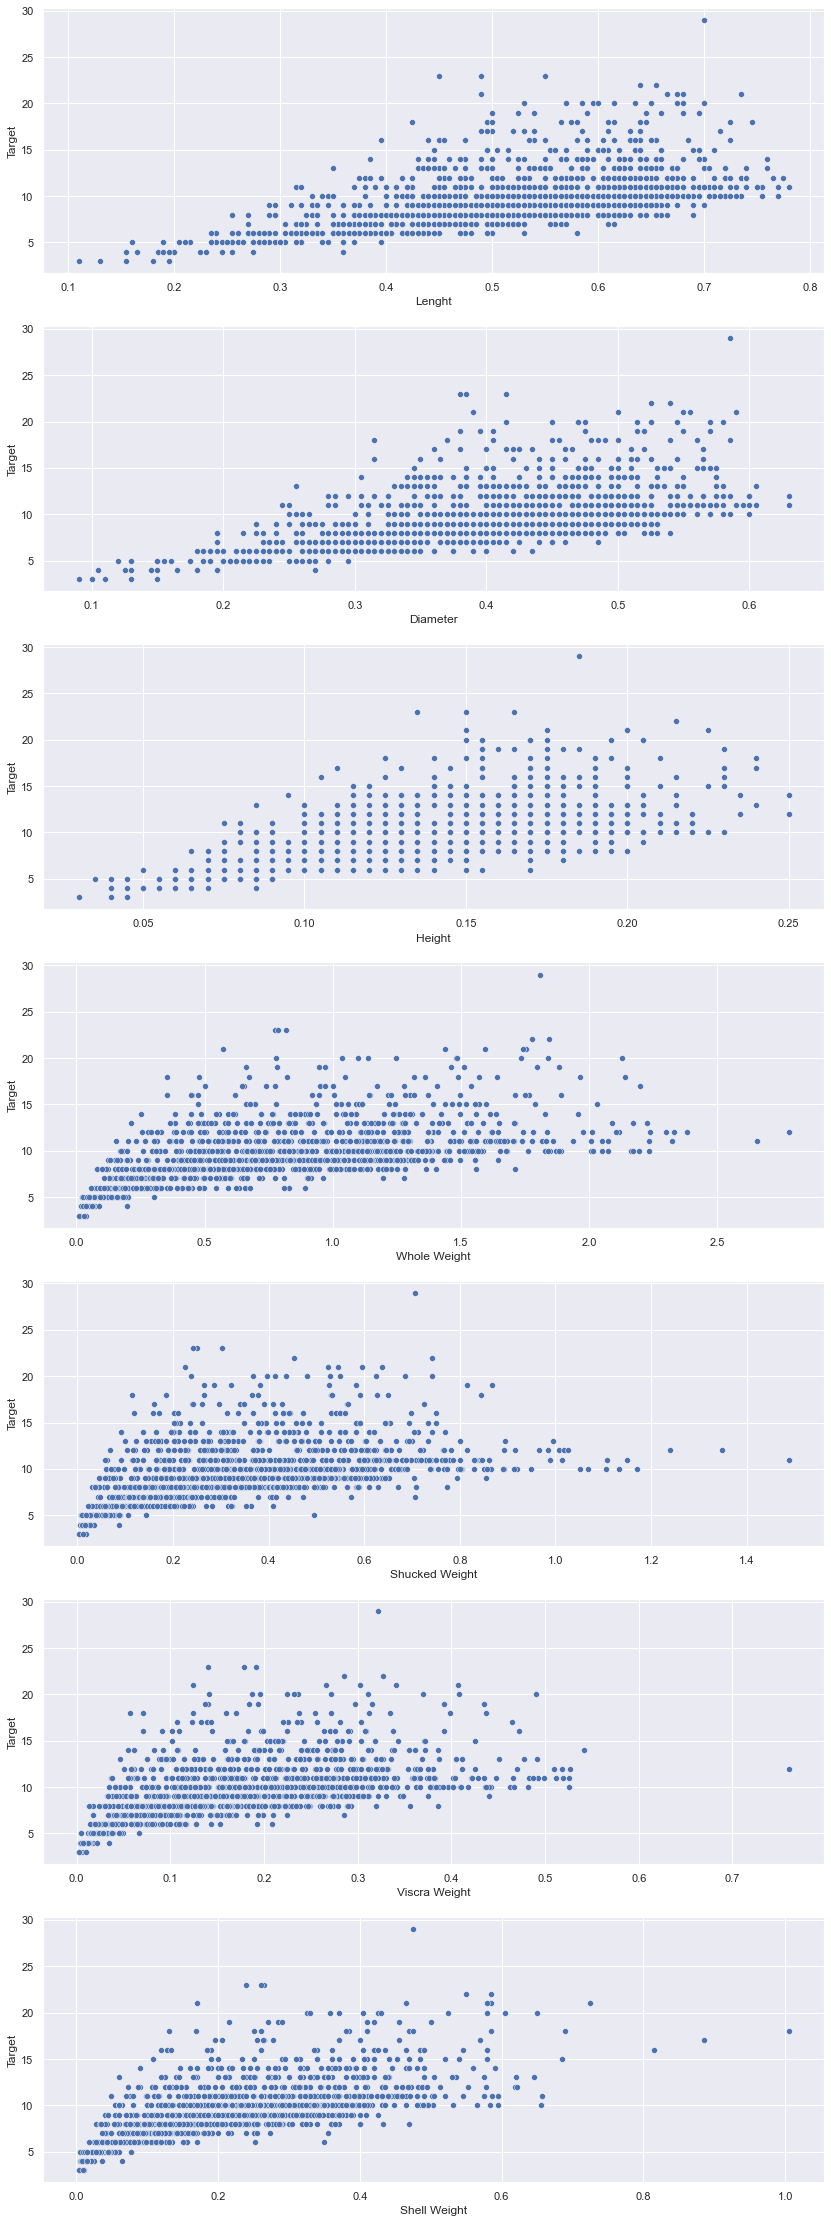

In [745]:
fig, axes = plt.subplots(7,1)
fig.set_size_inches(14,40)
sns.set(style='darkgrid')
for i in range(2,9):
    sns.scatterplot(data = train, x = cols[i], y = 'Target', ax = axes[i-2])

### 3-2. Delete Outliers

In [746]:
train.shape

(1253, 10)

In [747]:
#Delete Targets those are older than 23 since they feel useless for modelling
train.drop(train[train['Target']>=23].index, inplace = True)

In [748]:
train.shape

(1249, 10)

### 3-3. Check feature distribution of each age

In [749]:
cols

Index(['id', 'Gender', 'Lenght', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight', 'Target'],
      dtype='object')

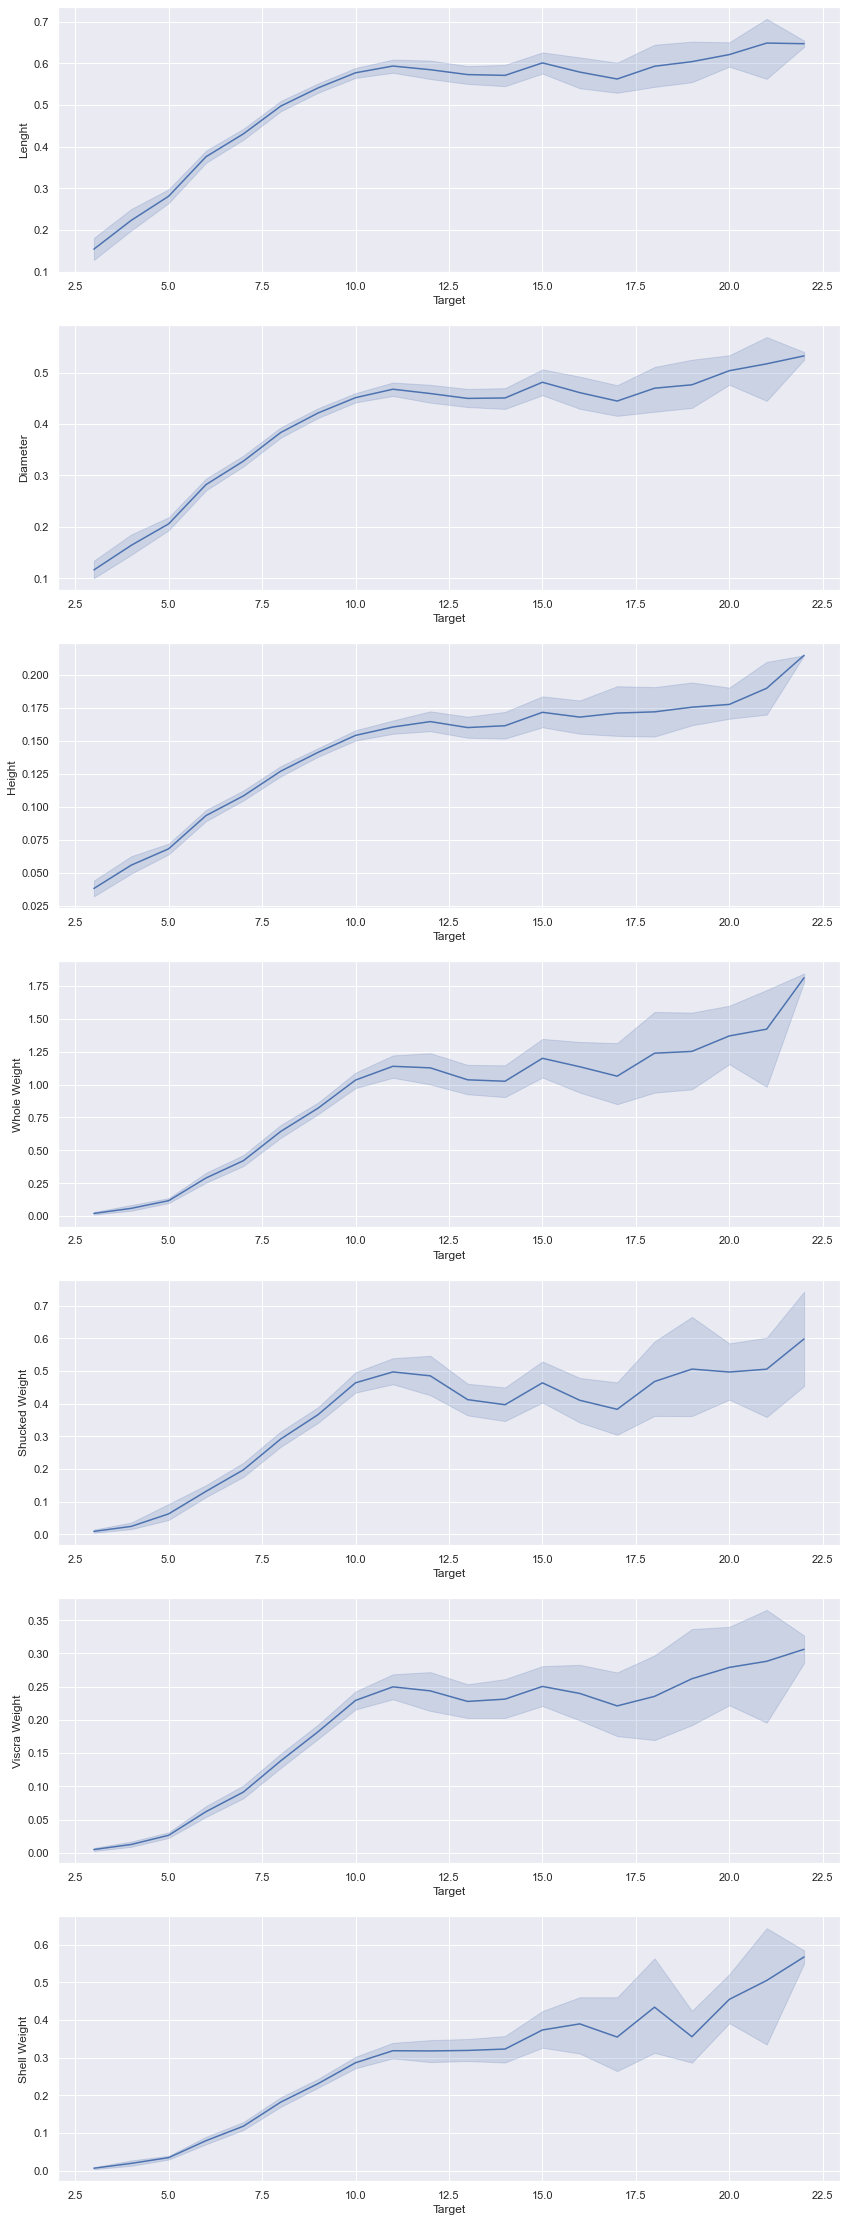

In [750]:
fig, axes = plt.subplots(7,1)
fig.set_size_inches(14,40)
sns.set(style='darkgrid')
for i in range(2,9):
    sns.lineplot(data = train, x = 'Target', y = cols[i], ax = axes[i-2])

### Situation : Both Size and Weight increase until the age of 11 and after that point both fluctuate -> Can't figure out if this is due to it's bio characteristic or wrong sampling

### Assumption. Weight can fluctuate while size cant -> Samples those are smaller than their usual size were chosen for Age 12, 13, 14, 16, 17

### Correction for Wrong Sampling

In [751]:
Target_index = [12,13,14,16,17,18,19]

In [752]:
len_idx = train[(train['Target'].isin(Target_index)) & (train['Lenght'] <= train['Lenght'].quantile(0.3))].index
dia_idx = train[(train['Target'].isin(Target_index)) & (train['Diameter'] <= train['Diameter'].quantile(0.3))].index
hei_idx = train[(train['Target'].isin(Target_index)) & (train['Height'] <= train['Height'].quantile(0.3))].index
whole_idx = train[(train['Target'].isin(Target_index)) & (train['Whole Weight'] <= train['Whole Weight'].quantile(0.3))].index
shucked_idx = train[(train['Target'].isin(Target_index)) & (train['Shucked Weight'] <= train['Shucked Weight'].quantile(0.3))].index
viscra_idx = train[(train['Target'].isin(Target_index)) & (train['Viscra Weight'] <= train['Viscra Weight'].quantile(0.3))].index
shell_idx = train[(train['Target'].isin(Target_index)) & (train['Shell Weight'] <= train['Shell Weight'].quantile(0.3))].index

In [753]:
len_idx = train[(train['Target'].isin(Target_index)) & (train['Lenght'] <= train['Lenght'].quantile(0.3))].index
dia_idx = train[(train['Target'].isin(Target_index)) & (train['Diameter'] <= train['Diameter'].quantile(0.3))].index
hei_idx = train[(train['Target'].isin(Target_index)) & (train['Height'] <= train['Height'].quantile(0.3))].index
whole_idx = train[(train['Target'].isin(Target_index)) & (train['Whole Weight'] <= train['Whole Weight'].quantile(0.3))].index
shucked_idx = train[(train['Target'].isin(Target_index)) & (train['Shucked Weight'] <= train['Shucked Weight'].quantile(0.3))].index
viscra_idx = train[(train['Target'].isin(Target_index)) & (train['Viscra Weight'] <= train['Viscra Weight'].quantile(0.3))].index
shell_idx = train[(train['Target'].isin(Target_index)) & (train['Shell Weight'] <= train['Shell Weight'].quantile(0.3))].index

In [754]:
new_idx = len_idx.append(dia_idx).append(hei_idx).append(whole_idx).append(shucked_idx).append(viscra_idx).append(shell_idx)

In [755]:
len(new_idx)

217

In [756]:
count = pd.DataFrame(new_idx)

<AxesSubplot:xlabel='0', ylabel='count'>

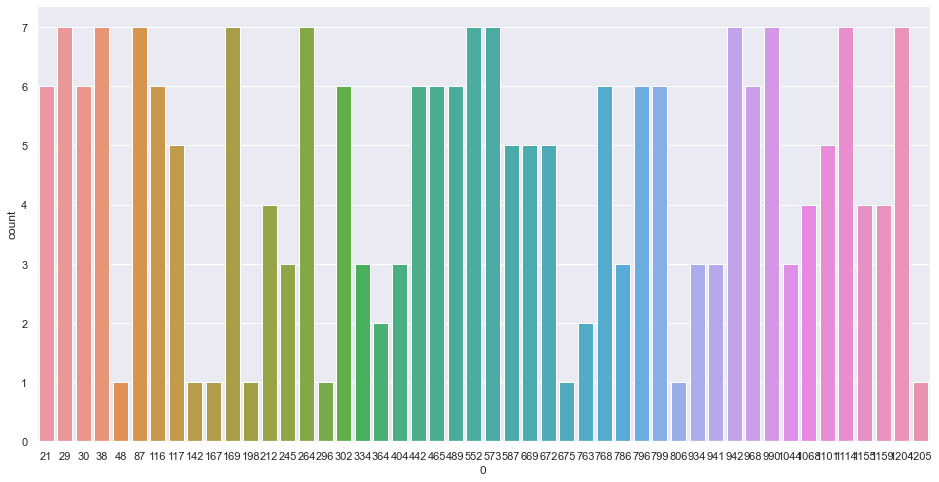

In [757]:
plt.figure(figsize = (16,8))
sns.countplot(count[0])

In [758]:
idx = [29,38,87,169,264,552,573,942,990,1114,1204,21,30,116,302,442,465,489,768,796,799,968]

In [759]:
train.loc[idx, 'Target']

29      13
38      12
87      12
169     12
264     12
552     12
573     13
942     16
990     12
1114    14
1204    13
21      12
30      18
116     14
302     13
442     13
465     12
489     12
768     14
796     16
799     12
968     12
Name: Target, dtype: int64

In [760]:
train.loc[idx, 'Lenght'] = 1.25 * train.loc[idx, 'Lenght']
train.loc[idx, 'Diameter'] = 1.25 * train.loc[idx, 'Diameter']
train.loc[idx, 'Height'] = 1.25 * train.loc[idx, 'Height']
train.loc[idx, 'Whole Weight'] = 1.25 * train.loc[idx, 'Whole Weight']
train.loc[idx, 'Shucked Weight'] = 1.25 * train.loc[idx, 'Shucked Weight']
train.loc[idx, 'Viscra Weight'] = 1.25 * train.loc[idx, 'Viscra Weight']
train.loc[idx, 'Shell Weight'] = 1.25 * train.loc[idx, 'Shell Weight']

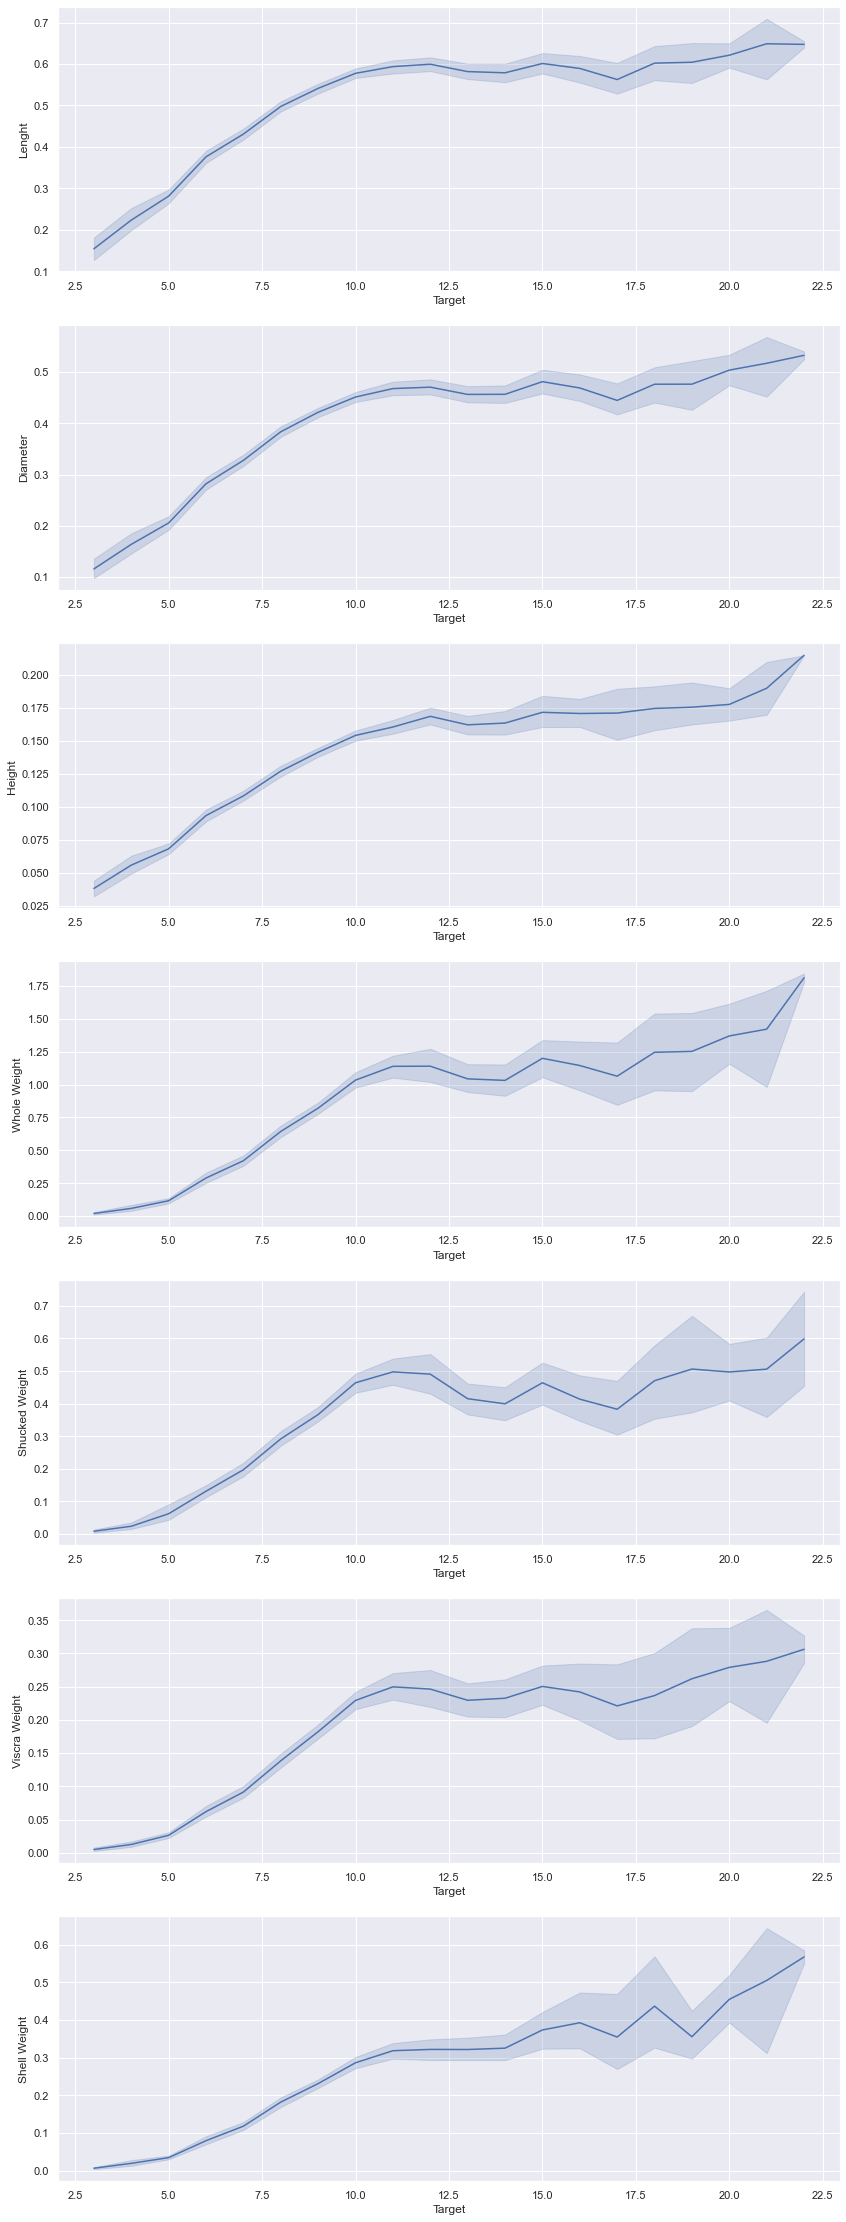

In [762]:
fig, axes = plt.subplots(7,1)
fig.set_size_inches(14,40)
sns.set(style='darkgrid')
for i in range(2,9):
    sns.lineplot(data = train, x = 'Target', y = cols[i], ax = axes[i-2])

### 3-3. One Hot Encoding

In [763]:
def male(x):
    if x == 'M':
        return 1
    else :
        return 0
    
def female(x):
    if x == 'F':
        return 1
    else :
        return 0
    
def intermediate(x):
    if x == 'I':
        return 1
    else :
        return 0
    
train['Male'] = train['Gender'].apply(male)
train['Female'] = train['Gender'].apply(female)
train['Intermediate'] = train['Gender'].apply(intermediate)

test['Male'] = test['Gender'].apply(male)
test['Female'] = test['Gender'].apply(female)
test['Intermediate'] = test['Gender'].apply(intermediate)

In [764]:
train.head(2)

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target,Male,Female,Intermediate
0,1,M,0.605,0.470,0.115,1.114,0.3925,0.291,0.3100,15,1,0,0
1,2,I,0.430,0.315,0.095,0.378,0.1750,0.080,0.1045,8,0,0,1


In [765]:
test.head(2)

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Male,Female,Intermediate
0,1,F,0.595,0.47,0.155,1.121,0.4515,0.1780,0.155,0,1,0
1,2,M,0.580,0.45,0.150,0.927,0.2760,0.1815,0.360,1,0,0


### 3-4. Correlation

In [766]:
train.corr()['Target']

id                0.051059
Lenght            0.578710
Diameter          0.600290
Height            0.634260
Whole Weight      0.554631
Shucked Weight    0.436243
Viscra Weight     0.514805
Shell Weight      0.645470
Target            1.000000
Male              0.211834
Female            0.227837
Intermediate     -0.442698
Name: Target, dtype: float64

### 3-5. Log Scaling 

In [767]:
from math import log, log10

In [768]:
def log100(x):
    return log(x,100)

In [769]:
train.head()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target,Male,Female,Intermediate
0,1,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15,1,0,0
1,2,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8,0,0,1
2,3,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18,0,0,1
3,4,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13,1,0,0
4,5,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6,0,0,1


In [770]:
train['log_whole_weight'] = train['Whole Weight'].apply(log)
train['log_Shucked_weight'] = train['Shucked Weight'].apply(log)
train['log_Viscra_weight'] = train['Viscra Weight'].apply(log)
train['log_Shell_weight'] = train['Shell Weight'].apply(log)

<AxesSubplot:xlabel='log_Shell_weight', ylabel='Target'>

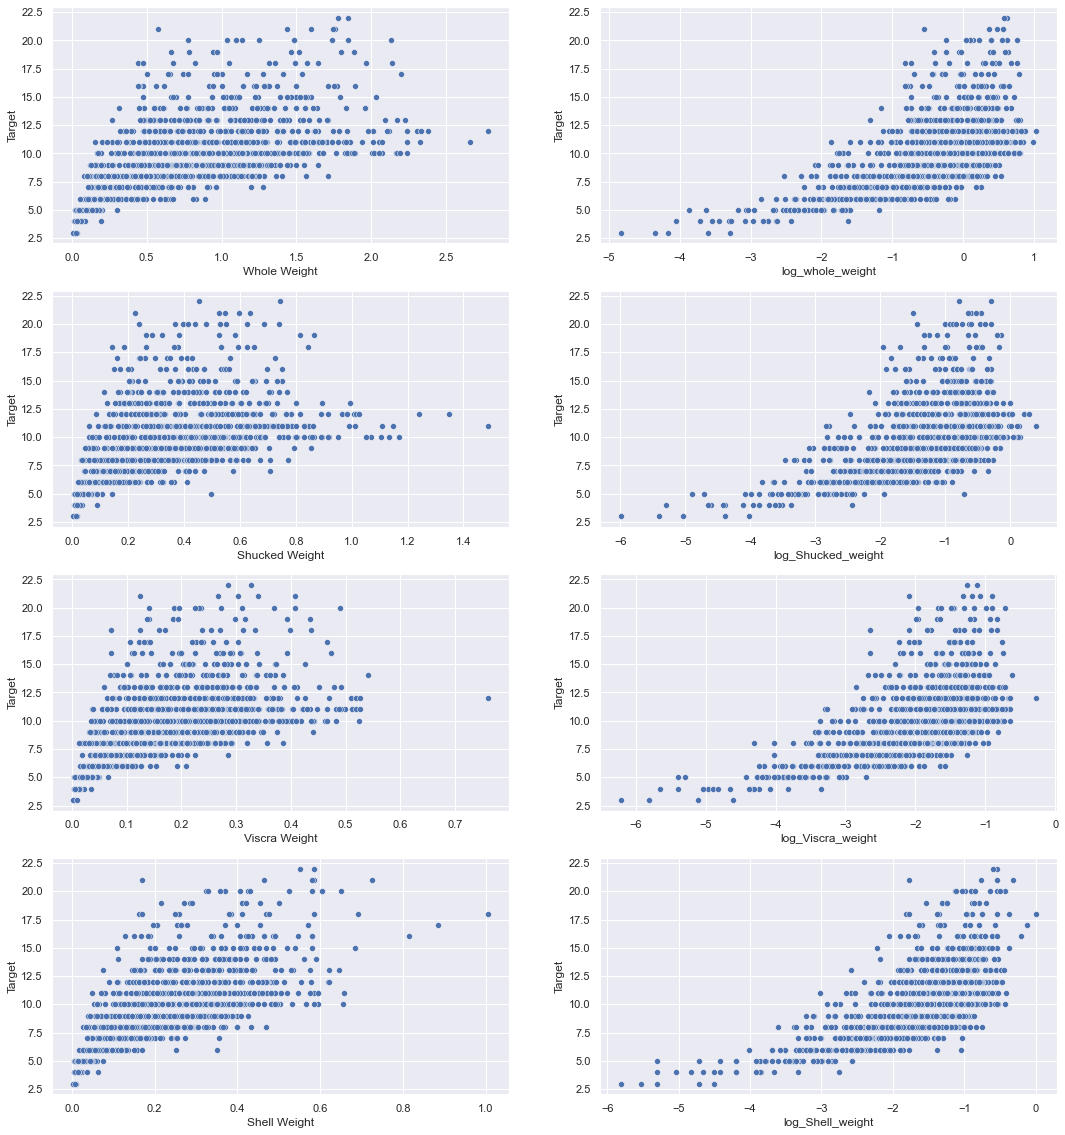

In [771]:
fig, ax = plt.subplots(4,2)
fig.set_size_inches(18,20)
sns.scatterplot(data = train, x = 'Whole Weight', y = 'Target', ax = ax[0,0])
sns.scatterplot(data = train, x = 'log_whole_weight', y = 'Target', ax = ax[0,1])
sns.scatterplot(data = train, x = 'Shucked Weight', y = 'Target', ax = ax[1,0])
sns.scatterplot(data = train, x = 'log_Shucked_weight', y = 'Target', ax = ax[1,1])
sns.scatterplot(data = train, x = 'Viscra Weight', y = 'Target', ax = ax[2,0])
sns.scatterplot(data = train, x = 'log_Viscra_weight', y = 'Target', ax = ax[2,1])
sns.scatterplot(data = train, x = 'Shell Weight', y = 'Target', ax = ax[3,0])
sns.scatterplot(data = train, x = 'log_Shell_weight', y = 'Target', ax = ax[3,1])

### 3-6. SQRT Scaling

In [772]:
from math import sqrt

In [773]:
train['sqrt_whole_weight'] = train['Whole Weight'].apply(sqrt)
train['sqrt_Shucked_weight'] = train['Shucked Weight'].apply(sqrt)
train['sqrt_Viscra_weight'] = train['Viscra Weight'].apply(sqrt)
train['sqrt_Shell_weight'] = train['Shell Weight'].apply(sqrt)

In [774]:
test['sqrt_whole_weight'] = test['Whole Weight'].apply(sqrt)
test['sqrt_Shucked_weight'] = test['Shucked Weight'].apply(sqrt)
test['sqrt_Viscra_weight'] = test['Viscra Weight'].apply(sqrt)
test['sqrt_Shell_weight'] = test['Shell Weight'].apply(sqrt)

<AxesSubplot:xlabel='sqrt_Shell_weight', ylabel='Target'>

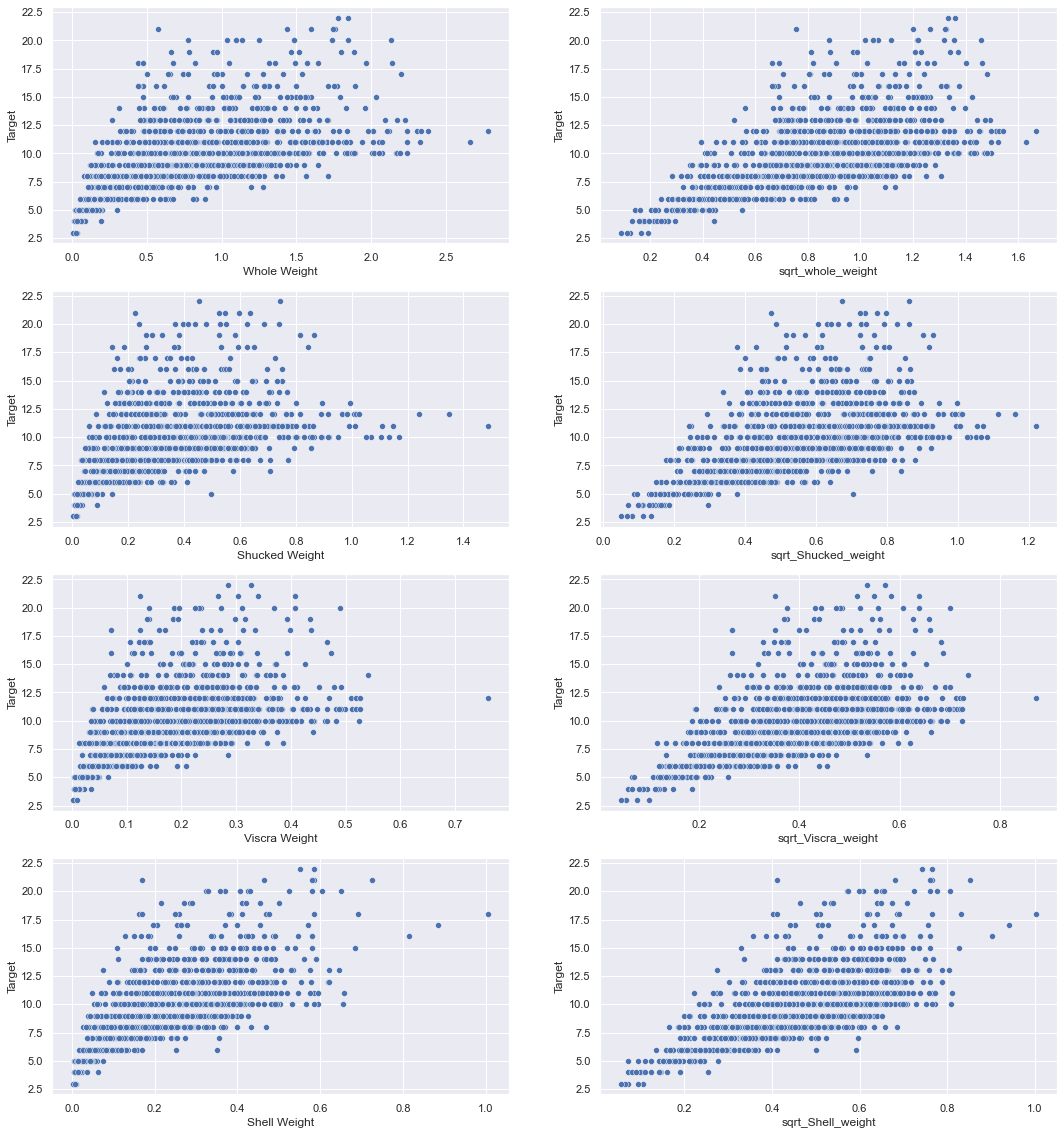

In [775]:
fig, ax = plt.subplots(4,2)
fig.set_size_inches(18,20)
sns.scatterplot(data = train, x = 'Whole Weight', y = 'Target', ax = ax[0,0])
sns.scatterplot(data = train, x = 'sqrt_whole_weight', y = 'Target', ax = ax[0,1])
sns.scatterplot(data = train, x = 'Shucked Weight', y = 'Target', ax = ax[1,0])
sns.scatterplot(data = train, x = 'sqrt_Shucked_weight', y = 'Target', ax = ax[1,1])
sns.scatterplot(data = train, x = 'Viscra Weight', y = 'Target', ax = ax[2,0])
sns.scatterplot(data = train, x = 'sqrt_Viscra_weight', y = 'Target', ax = ax[2,1])
sns.scatterplot(data = train, x = 'Shell Weight', y = 'Target', ax = ax[3,0])
sns.scatterplot(data = train, x = 'sqrt_Shell_weight', y = 'Target', ax = ax[3,1])

### sqrt 변환 채택

## 4. Modeling

In [776]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import StratifiedKFold

In [777]:
train.columns

Index(['id', 'Gender', 'Lenght', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight', 'Target', 'Male',
       'Female', 'Intermediate', 'log_whole_weight', 'log_Shucked_weight',
       'log_Viscra_weight', 'log_Shell_weight', 'sqrt_whole_weight',
       'sqrt_Shucked_weight', 'sqrt_Viscra_weight', 'sqrt_Shell_weight'],
      dtype='object')

In [778]:
X = train[['Lenght', 'Diameter', 'Height', 'sqrt_whole_weight', 'sqrt_Shucked_weight', 
           'sqrt_Viscra_weight', 'sqrt_Shell_weight','Male', 'Female','Intermediate']] # 제곱근 모델
y = train['Target']

In [779]:
test_X = test[['Lenght', 'Diameter', 'Height', 'sqrt_whole_weight', 'sqrt_Shucked_weight', 
           'sqrt_Viscra_weight', 'sqrt_Shell_weight','Male', 'Female','Intermediate']] # 테스트셋 제곱근 모델

In [780]:
X.shape

(1249, 10)

In [781]:
X = np.asarray(X)

In [782]:
y = np.asarray(y)

### 4-1. Model Selection (RF, LR, DT)

In [783]:
#RF
skf = StratifiedKFold(n_splits = 5)
rf_cl_cv_accuracy = []
rf_lr_cv_accuracy = []
lr_cv_accuracy = []
dt_cv_accuracy = []


for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf_cl_model = RandomForestClassifier()
    rf_cl_model.fit(X_train, y_train)
    rf_cl_pred = rf_cl_model.predict(X_test)
    rf_cl_cv_accuracy.append(mean_absolute_error(y_test, rf_cl_pred))
    
    rf_lr_model = RandomForestRegressor()
    rf_lr_model.fit(X_train, y_train)
    rf_lr_pred = rf_lr_model.predict(X_test)
    rf_lr_cv_accuracy.append(mean_absolute_error(y_test, rf_lr_pred))

In [784]:
#LR, DT
for train_index, test_index in skf.split(X, y):
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    lr_pred = lr_model.predict(X_test)
    lr_cv_accuracy.append(mean_absolute_error(y_test, lr_pred))
        
    dt_model = DecisionTreeClassifier()
    dt_model.fit(X_train, y_train)
    dt_pred = dt_model.predict(X_test)
    dt_cv_accuracy.append(mean_absolute_error(y_test, dt_pred))

In [785]:
print(f"RF_CL MAE : {np.mean(rf_cl_cv_accuracy):.4f}")
print(f"RF_LR MAE : {np.mean(rf_lr_cv_accuracy):.4f}")
print(f"LR MAE: {np.mean(lr_cv_accuracy):.4f}")
print(f"DT MAE: {np.mean(dt_cv_accuracy):.4f}")

RF_CL MAE : 1.6582
RF_LR MAE : 1.5490
LR MAE: 1.5261
DT MAE: 2.0506


### LGBM

In [786]:
lgbm_re_accuracy = []
lgbm_cl_accuracy = []
from lightgbm import LGBMClassifier, LGBMRegressor
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lgbm_re_model = LGBMRegressor(random_state = 42,
                                  learning_rate = 0.04, max_depth = 7, n_estimators = 90, num_leaves = 10)
    lgbm_re_model.fit(X_train, y_train)
    lgbm_re_pred = lgbm_re_model.predict(X_test)
    lgbm_re_accuracy.append(mean_absolute_error(y_test, lgbm_re_pred))

In [787]:
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lgbm_cl_model = LGBMClassifier()
    lgbm_cl_model.fit(X_train, y_train)
    lgbm_cl_pred = lgbm_cl_model.predict(X_test)
    lgbm_cl_accuracy.append(mean_absolute_error(y_test, lgbm_cl_pred))

In [788]:
print(f"LGBM RE MAE: {np.mean(lgbm_re_accuracy):.4f}")
print(f"LGBM CL MAE: {np.mean(lgbm_cl_accuracy):.4f}")

LGBM RE MAE: 1.4939
LGBM CL MAE: 1.6950


### Decided to use Random Forest Regressor, LGBM Regressor

## 4-2. Hyper Parameter Tuning

In [789]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### 4-2-1. Random Forest Regressor

In [790]:
model_RF = RandomForestRegressor(random_state = 42)

In [791]:
params = {'n_estimators' : [50, 100, 150],
          'max_depth' : [6, 7, 8],
          'min_samples_split' : [2, 3, 4],
          'min_samples_leaf' : [1, 2, 3]}

clf = GridSearchCV(model_RF, params, cv = 5, scoring = 'neg_mean_absolute_error')
clf.fit(X,y)
print(f'Best Params : {clf.best_params_}')
print(f'Best Score : {clf.best_score_}')

Best Params : {'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50}
Best Score : -1.488352453024314


### 4-2-2. LGBM Regressor

In [792]:
model_LGBM = LGBMRegressor(random_state = 42)

In [793]:
params = {'n_estimators' : [40, 50, 60],
          'max_depth' : [6, 7, 8],
          'learning_rate' : [0.1, 0.08, 0.06],
          'num_leaves' : [15, 20, 25]}

clf = GridSearchCV(model_LGBM, params, cv = 5, scoring = 'neg_mean_absolute_error')
clf.fit(X,y)

print(f'Best Params : {clf.best_params_}')
print(f'Best Score : {clf.best_score_}')

Best Params : {'learning_rate': 0.06, 'max_depth': 7, 'n_estimators': 60, 'num_leaves': 15}
Best Score : -1.4749683744907411


In [794]:
params = {'n_estimators' : [60, 55, 65],
          'max_depth' : [6, 7, 8],
          'learning_rate' : [0.01, 0.04, 0.06],
          'num_leaves' : [15, 14, 16]}

clf = GridSearchCV(model_LGBM, params, cv = 5, scoring = 'neg_mean_absolute_error')
clf.fit(X,y)

print(f'Best Params : {clf.best_params_}')
print(f'Best Score : {clf.best_score_}')

Best Params : {'learning_rate': 0.06, 'max_depth': 8, 'n_estimators': 65, 'num_leaves': 14}
Best Score : -1.4749533151074983


### Apply Model to the test data

In [795]:
final_model = LGBMRegressor(max_depth =  8, learning_rate = 0.06, num_leaves = 14, n_estimators = 65)

In [796]:
final_model.fit(X, y)

LGBMRegressor(learning_rate=0.06, max_depth=8, n_estimators=65, num_leaves=14)

In [797]:
test_pred = final_model.predict(test_X)

In [798]:
test_pred

array([ 9.04536682, 12.49394416,  5.75282789, ...,  9.30808889,
        9.07755463, 11.87380967])

In [799]:
sub_sample = pd.read_csv('sample_submission.csv')

In [800]:
sub_sample['Target'] = test_pred

In [801]:
sub_sample.to_csv('submission.csv', index = False)

In [802]:
sub_sample

,id,Target
0,1,9.045367
1,2,12.493944
2,3,5.752828
3,4,11.072621
4,5,10.083564
...,...,...
2919,2920,4.423685
2920,2921,7.469556
2921,2922,9.308089
2922,2923,9.077555


<AxesSubplot:ylabel='Density'>

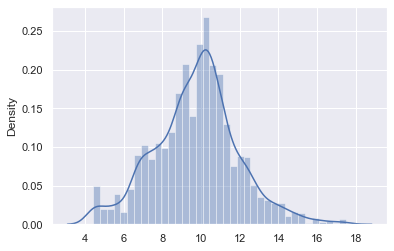

In [804]:
sns.distplot(x = sub_sample['Target'])

In [805]:
sub_sample['Target'].max()

17.50078341318927